## Observations and Insights 

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_count=len(merged_df['Mouse ID'].unique())
print(f'The number of mice in merged DataFrame is {merged_count}')

The number of mice in merged DataFrame is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df["Duplicates"]=merged_df.duplicated(['Mouse ID','Timepoint'])
duplicates_list=(merged_df.loc[merged_df['Duplicates']==True, ['Mouse ID']])['Mouse ID'].unique()
duplicates_df=pd.DataFrame({"Duplicated mice ID":duplicates_list})
duplicates_df

,Duplicated mice ID
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_df=merged_df.loc[merged_df['Mouse ID']==duplicates_list[0],:]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=merged_df.loc[merged_df['Mouse ID']!='g989',:]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicates
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df_count=len(cleaned_df['Mouse ID'].unique())
print(f'The number of mice in the clean DataFrame is {cleaned_df_count}')

The number of mice in the clean DataFrame is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

ss_df=cleaned_df[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']].copy()
grouped_ss_df=ss_df.groupby(['Drug Regimen'])
ss_mean=grouped_ss_df['Tumor Volume (mm3)'].mean()
ss_median=grouped_ss_df['Tumor Volume (mm3)'].median()
ss_var=grouped_ss_df['Tumor Volume (mm3)'].var()
ss_std=grouped_ss_df['Tumor Volume (mm3)'].std()
ss_sem=grouped_ss_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
ss_output_df=pd.DataFrame({'Tumor Volume (mm3) mean':ss_mean, 'Tumor Volume (mm3) median':ss_median,
                           'Tumor Volume (mm3) variance':ss_var,'Tumor Volume (mm3) standard deviation':ss_std,
                          'Tumor Volume (mm3) sem':ss_sem})
ss_output_df

,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<IPython.core.display.Javascript object>


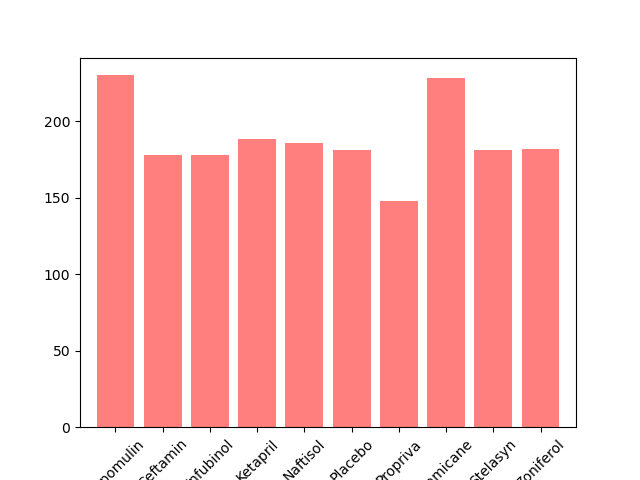

<function matplotlib.pyplot.show(block=None)>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
%matplotlib notebook
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
ss_count=grouped_ss_df['Tumor Volume (mm3)'].count()
### print(ss_count_df)
x_axis=np.arange(ss_count.count())
plt.bar(x_axis, ss_count,color='red',alpha=0.5,align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ss_count.keys(), rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.show

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
